In [1]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\Rachael\Project 4\Resources\Life Expectancy Data.csv'
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [2]:
# Check for missing values
print(df.isnull().sum())


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [3]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)


In [4]:
# Print the column names
print(df.columns)


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [13]:
# Clean column names again, as we may need to adjust for consistency
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Verify the cleaned column names
print(df.columns.tolist())

# Update the list of columns to fill
columns_to_fill = [
    'alcohol', 'hepatitis_b', 'bmi', 'polio', 
    'total_expenditure', 'diphtheria', 'gdp', 
    'population', 'thinness__1-19_years',  # This name should now match the cleaned version
    'thinness_5-9_years', 'income_composition_of_resources', 
    'schooling'
]

# Fill specified columns with their mean
for column in columns_to_fill:
    if column in df.columns and df[column].dtype in ['float64', 'int64']:  # Check if the column exists and is numeric
        df[column] = df[column].fillna(df[column].mean())
    else:
        print(f"Column '{column}' does not exist or is not numeric.")

# After filling, check for any remaining missing values
print(df.isnull().sum())



['country', 'year', 'status', 'life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years', 'thinness_5-9_years', 'income_composition_of_resources', 'schooling']
country                             0
year                                0
status                              0
life_expectancy                    10
adult_mortality                    10
infant_deaths                       0
alcohol                             0
percentage_expenditure              0
hepatitis_b                         0
measles                             0
bmi                                 0
under-five_deaths                   0
polio                               0
total_expenditure                   0
diphtheria                          0
hiv/aids                            0
gdp                                 0
populat

In [14]:
# Check for remaining missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


life_expectancy    10
adult_mortality    10
dtype: int64


In [16]:
# Drop rows with any missing values
df.dropna(inplace=True)

# Or drop rows with missing values in specific columns
# df.dropna(subset=['life_expectancy', 'adult_mortality'], inplace=True)


In [17]:
# Check again for remaining missing values
print(df.isnull().sum())


country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness__1-19_years               0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64


In [18]:
# If 'status' is a categorical variable
df = pd.get_dummies(df, columns=['status'], drop_first=True)  # One-hot encoding


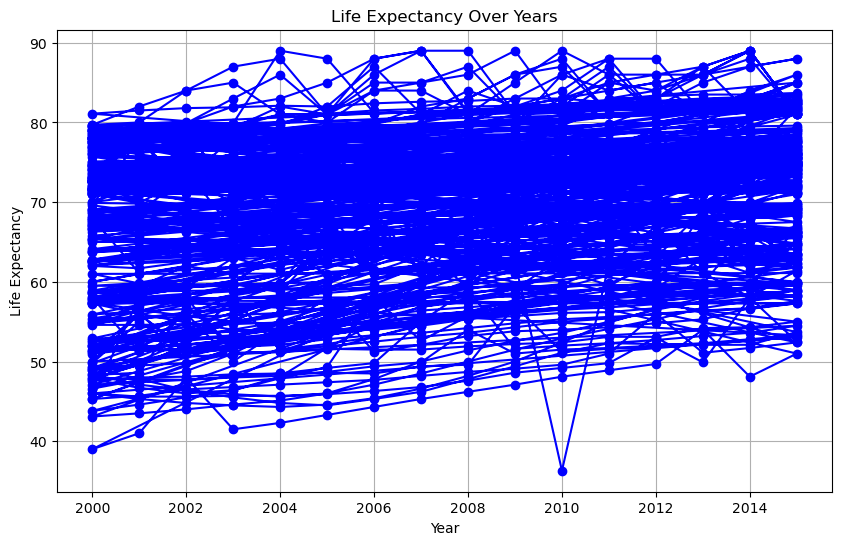

In [19]:
import matplotlib.pyplot as plt

# Example: Plotting life expectancy over years
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['life_expectancy'], marker='o', linestyle='-', color='b')
plt.title('Life Expectancy Over Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid()
plt.show()


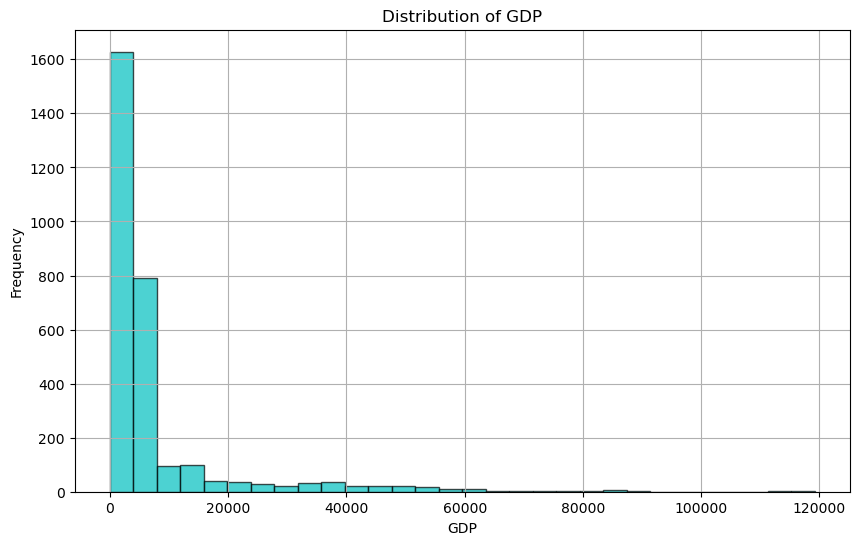

In [21]:
# Example: Distribution of GDP
plt.figure(figsize=(10, 6))
plt.hist(df['gdp'], bins=30, color='c', edgecolor='black', alpha=0.7)
plt.title('Distribution of GDP')
plt.xlabel('GDP')
plt.ylabel('Frequency')
plt.grid()
plt.show()


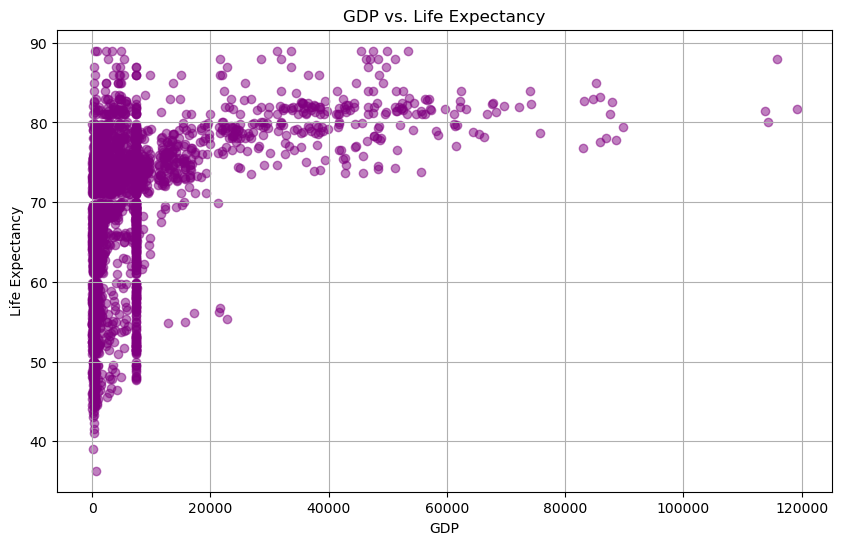

In [23]:
# Example: Scatter plot of GDP vs. Life Expectancy
plt.figure(figsize=(10, 6))
plt.scatter(df['gdp'], df['life_expectancy'], color='purple', alpha=0.5)
plt.title('GDP vs. Life Expectancy')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.grid()
plt.show()


In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
# Select the features you want to standardize
features_to_standardize = [
    'alcohol', 
    'adult_mortality', 
    'infant_deaths', 
    'percentage_expenditure', 
    'hepatitis_b', 
    'measles', 
    'bmi', 
    'under-five_deaths', 
    'polio', 
    'total_expenditure', 
    'diphtheria', 
    'hiv/aids', 
    'gdp', 
    'population', 
    'thinness__1-19_years', 
    'thinness_5-9_years', 
    'income_composition_of_resources', 
    'schooling'
]

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])

# Display the first few rows of the standardized DataFrame
print(df.head())


       country  year  life_expectancy  adult_mortality  infant_deaths  \
0  Afghanistan  2015             65.0         0.791586       0.268824   
1  Afghanistan  2014             59.9         0.856072       0.285786   
2  Afghanistan  2013             59.9         0.831890       0.302749   
3  Afghanistan  2012             59.5         0.864132       0.328193   
4  Afghanistan  2011             59.2         0.888314       0.345155   

    alcohol  percentage_expenditure  hepatitis_b   measles       bmi  ...  \
0 -1.172958               -0.335570    -0.705861 -0.110384 -0.964715  ...   
1 -1.172958               -0.334441    -0.838704 -0.168124 -0.989810  ...   
2 -1.172958               -0.334594    -0.750142 -0.173531 -1.014905  ...   
3 -1.172958               -0.332096    -0.617299  0.032045 -1.040000  ...   
4 -1.172958               -0.367862    -0.573018  0.051757 -1.060076  ...   

   total_expenditure  diphtheria  hiv/aids       gdp  population  \
0           0.925806   -0.7329

In [27]:
import pandas as pd

# Set display options
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Assuming df is your DataFrame
df.rename(columns={'status_Developing': 'is_Developing'}, inplace=True)

# Display the styled DataFrame
styled_df = df.style.highlight_max(axis=0, color='lightgreen')
display(styled_df)



In [30]:
import pandas as pd

# Sample DataFrame creation (for illustration)
data = {
    'country': ['Afghanistan', 'Afghanistan', 'Afghanistan'],
    'year': [2015, 2014, 2013],
    'status': ['Developing', 'Developing', 'Developed'],
    'life_expectancy': [65.0, 59.9, 59.9]
}

df = pd.DataFrame(data)

# Check the columns
print(df.columns)

# Check for missing values
print(df['status'].isna().sum())

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['status'], drop_first=True)

# Display the encoded DataFrame
print(df_encoded)


Index(['country', 'year', 'status', 'life_expectancy'], dtype='object')
0
       country  year  life_expectancy  status_Developing
0  Afghanistan  2015            65.00               True
1  Afghanistan  2014            59.90               True
2  Afghanistan  2013            59.90              False


In [31]:
# Separate features and target variable
X = df.drop(columns=['life_expectancy', 'country', 'year'])
y = df['life_expectancy']


In [32]:
# Separate features and target variable
X = df.drop(columns=['life_expectancy', 'country', 'year'])
y = df['life_expectancy']


In [33]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
